# Homework 2: QR Factorizations and Least Squares

In [1]:
import Pkg; Pkg.add(["Plots","SpecialFunctions"]);
using LinearAlgebra;
using Plots;
using SpecialFunctions;

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


**1. [10%]** (T&B 6.5) Let $P \in \mathbb{C}^{m \times m}$ be a nonzero projector.  Show that $\|P\|_2 \geq 1$, with equality if and only if $P$ is an orthogonal projector.


Suppose $P$ is a nonzero projector: let $\tilde P$ be the orthogonal projector with the same nullspace, so that
$\mathrm{range}(I - P) = \mathrm{range}(I - \tilde P)$.  Let $z$ be given: we first decompose $z$ into its $\tilde P$ and $(I - \tilde P)$ components and then apply $P$:
$$
P z = P (\tilde P z + (I - \tilde P) z) = P \tilde P z + P (I - \tilde P) z = P \tilde P z,
$$
where we have $P(I - \tilde P) z = 0$ because $(I - \tilde P) z$ is in the nullspace of $P$ by design.
So
$$
\|Pz\|_2^2 = \|P \tilde P z \|_2^2.
$$
Because $\tilde P$ is orthogonal, we can decompose $\|Pz\|_2^2$ into two components,
$$
\|Pz\|_2^2 = \|P \tilde P z \|_2^2 = \|\tilde P P \tilde P z\|_2^2 + \|(I - \tilde P) P \tilde P z\|_2^2.
$$
I claim that $\tilde P P \tilde P z = \tilde P z$:
$$
\tilde P z = \tilde P^2 z  = \tilde P (P + (I - P)) \tilde P z = \tilde P P \tilde P z + \tilde P(I-P) \tilde P z = \tilde P P \tilde P z,
$$
where we have $\tilde P(I-P) \tilde P z = 0$ because again $\mathrm{range}(I-P) = \mathrm{null}(\tilde P)$.

Therefore
$$
\|P \tilde P z\|_2^2 = \|\tilde P z \|_2^2 + \|(I - \tilde P) P \tilde P z\|_2^2,
$$
which rearranged gives
$$
\frac{\|P ( \tilde P z) \|_2^2}{\| \tilde P z\|_2^2} = 1 + \frac{\|(I - \tilde P)P \tilde P z\|_2^2}{\|\tilde P z\|_2^2}. 
$$
This implies that $\|P\|_2^2 \geq 1$, with equality if and only if
$$
(I - \tilde P) P \tilde P z = 0, \quad \text{for all }z.
$$
That means
$$
P \tilde P = \tilde P P \tilde P = \tilde P,
$$
where we established that last equality earlier.  This implies $\mathrm{range}(\tilde P) \subset \mathrm{range}(P)$, but by design the have the same rank, so $\mathrm{range}(\tilde P) = \mathrm{range}(P)$.  The two projectors already have the same nullspace, so this shows they are equal.  Therefore $\|P\|_2 = 1$ if and only if $P = \tilde P$, i.e., $P$ is orthogonal.

**2. [5%]** (T&B 7.4) Let $x^{(1)}$, $y^{(1)}$, $x^{(2)}$, and $y^{(2)}$ be nonzero vectors in $\mathbb{R}^3$ with the property that $x^{(1)}$ and $y^{(1)}$ are linearly independent and so are $x^{(2)}$ and $y^{(2)}$.  Consider the two planes in $\mathbb{R}^3$,

$$P^{(1)} = \mathrm{span}\{x^{(1)},y^{(1)}\},\quad P^{(2)} = \mathrm{span}\{x^{(2)},y^{(2)}\}.$$

Suppose we wish to find a nonzero vector $v \in \mathbb{R}^{3}$ that lies in the intersection $P = P^{(1)} \cap P^{(2)}$.  Devise a method for solving the problem by reducing it to the computation of three $3 \times 2$ matrices.

In [2]:
function intersect_two_planes(x1, y1, x2, y2)
    """
    Compute a vector in the intersection of the planes span{x1,y1} and span{x2,y2}.
    
    # Arguments
    
    - `x1`, `y1`: two linearly independent vectors in ℝ³
    - `x2`, `y2`: two linearly independent vectors in ℝ³
    
    # Returns
    
    - `z`: a vector in ℝ³ in the intersection of span{x1,y1} and span{x2,y2}
    """
    ### BEGIN SOLUTION
    Q1,_ = qr([x1 y1])
    Q2,_ = qr([x2 y2])
    Q3,_ = qr([Q1[:,3] Q2[:,3]])
    z = Q3[:,3]
    ### END SOLUTION
    return z
end

intersect_two_planes (generic function with 1 method)

In [3]:
x1 = randn(3); y1 = randn(3); x2 = randn(3); y2 = randn(3);

z = intersect_two_planes(x1, y1, x2, y2);
@assert(rank([x1 y1 z]) == 2) # if z is in span{x1,y1}, then [x1 y1 z] should span a 2D space
@assert(rank([x2 y2 z]) == 2) # likewise for x2 and y2

**3.** (T&B 7.5) Let $A$ be an $m \times n$ matrix ($m \geq n$) and let $A = \hat Q \hat R$ be a reduced QR factorization.

**(a) [5%]** Show that $A$ has rank $n$ if and only if all the diagonal entries of $\hat R$ are nonzero.

The matrix $\hat Q$ is always full rank, so we only have to show that $\hat R$ has rank $n$ if and only if all the diagonal entries of $\hat R$ are nonzero.

The rank of $\hat R$ is $n$ if and only if it is nonsingular.  $\hat R$ is nonsingular if and only if $\det(\hat R) \neq 0$.  For a diagonal matrix $\det(\hat R)$ is the product of the diagonal entries, so
$\det(\hat R) \neq 0$ if and only if all of the diagonal entries are nonzero.

**(b) [5%]** Suppose $\hat R$ has exactly $k$ nonzero diagonal entries for some $k$ with $0 \leq k < n.$  What does this imply about the rank of $A$?  Exactly $k$? At least $k$?  At most $k$?  Give a precise answer, and prove it.

The rank of $A$ is the rank of $\hat R$, and the rank of $\hat R$ is at least $k$.

Let $i_1 < i_2 < \dots < i_k$ be the indices for the nonzero diagonal entries of $\hat R$, and let
$\tilde R \in \mathbb{C}^{k \times k}$ be the matrix formed (using julia notation) $\tilde R[j,k] = \hat R[i_j,i_k]$.  This matrix is upper triangular: if $j > k$, then $i_j > i_k$, and so $\tilde R[j,k] =
\hat R[i_j,i_k] = 0.$  By design all of the nonzero entries of $\tilde R$ are nonzero, so by part (a)
$\tilde R$ has rank $k$.  The rank of a matrix must be at least as big as the rank of any submatrix, so
the rank of $\hat R$ is at least $k$.

It is not exactly $k$ in general, and we give an example: $\begin{bmatrix}
0 & 1 \\ 0 & 0
\end{bmatrix}$ is a matrix with $k = 0$ nonzero diagonal entries, but its rank is $1 > k$.

**4.** (T&B Lecture 9 Experiment 2) The goal of this problem is to build familiarity with the popular QR algorithms discussed in class and to explore the properties of different QR variants.
You will be asked to implement the different QR algorithms as well as give textual analysis and justification in the form of prose.

You will test your implementations of QR on matrices with _exponentially graded_ singular values, generated by the function `graded_mat`.

In [4]:
function graded_mat(T::DataType, m, n)::Matrix{T}
    """
    Construct an `m` × `n` matrix with the singular values (2⁻¹,…,2⁻ᵖ),
    where p = min(m, n).
    
    # Arguments
    
    - `T`: Datatype for the matrix `A`
    - `m`, `n`: Dimensions of the matrix `A`
    
    # Returns
    
    - `A`: A random matrix with thoses singular values
    """
    # Using julia qr to generate random orthogonal matrices
    p = min(m,n)
    U,_ = qr(randn(T,m,p))
    V,_ = qr(randn(T,n,p))
    
    # Construct a matrix with exponentially graded singular values
    S = Diagonal(exp2.(collect(T,-1:-1:-p)))
    # the smart Q returned by qr doesn't multiply with a "thin" diagonal
    A = if m >= n U*(S*V') else (U*S)*V' end
    return A  
end

graded_mat(m, n)::Matrix{Float64} = graded_mat(Float64, m, n)
graded_mat(m)::Matrix{Float64} = graded_mat(m, m)

graded_mat (generic function with 3 methods)

**(a) [6%]** Implement the classical Gram-Schmidt procedure (Algorithm 7.1) in the function below. Your function should return the reduced QR factorization $A =\hat Q \hat R$. Be careful not to modify the contents of `A`.

In [5]:
function cgs_qr(A)
    """
    Compute and return the QR factorization of `A` by Classical Gram-Schmidt procedure.

    # Arguments

    - `A`: m × n matrix (m ≥ n) to factor

    # Returns

    - `Q`: m × n matrix with orthonormal columns spanning range(A)
    - `R`: n × n upper triangular matrix, coefficients of columns of `A` 
           in the basis of `Q`
    """
    ### BEGIN SOLUTION
    m, n = size(A)
    Q = Matrix{eltype(A)}(undef, m, n)
    R = zeros(eltype(A), n, n)
    for j in 1:n
        R[1:(j-1),j] = Q[:,1:(j-1)]' * A[:,j]
        Q[:,j] = A[:,j] - Q[:,1:(j-1)] * R[1:(j-1),j]
        R[j,j] = norm(Q[:,j], 2)
        Q[:,j] /= R[j,j]
    end
    ### END SOLUTION
    return Q, R
end

cgs_qr (generic function with 1 method)

In [6]:
function qr_test(A, fact, recon_tol=1.e-13, triu_tol=0.0)
    """
    Test a QR factorization.  Print the orthgonality error,
    reconstruction error, and triangularity error.
    Assert that the reconstruction error and
    triangularity error are not larger than specified tolerances.
        
    # Inputs
    
    - `A`: a matrix
    - `fact`: function that produces a QR factorization, `Q,R = fact(A)`
    - `recon_tol`: tolerance for || A - Q R ||_F
    - `triu_tol`: tolerance for || R - triu(R) ||_F
    
    # Returns
    
    - `ortho_err`:  ||I - Q' Q ||_F
      (not asserted to be less than some value,
      because different factorizations have
      different expected orthogonaliy errors)
    """
    Q, R = fact(A)
    ortho_err = norm(I - Q'*Q, 2)
    recon_err = norm(A - Q*R, 2)
    p = minimum(size(R))
    triu_err = norm(R[1:p,1:p] - UpperTriangular(R[1:p,1:p]), 2)
    println("orthogonality error: $ortho_err")
    println("reconstruction error: $recon_err")
    println("triangularity error: $triu_err")
    @assert recon_err <= recon_tol
    @assert triu_err <= triu_tol
    return ortho_err
end

qr_test (generic function with 3 methods)

In [7]:
# Test a well-conditioned problem

ortho_err = qr_test(randn(10, 9), cgs_qr)
@assert ortho_err < 1.e-12

orthogonality error: 8.05931798509106e-16
reconstruction error: 7.169425556016663e-16
triangularity error: 0.0


In [8]:
# Test a complex matrix

ortho_err = qr_test(randn(Complex{Float64}, 10, 9), cgs_qr)
@assert ortho_err < 1.e-12

orthogonality error: 1.792042232486495e-15
reconstruction error: 1.0364014861564882e-15
triangularity error: 0.0


In [9]:
# Test a graded matrix: should lose accuracy

ortho_err = qr_test(graded_mat(20), cgs_qr)
@assert ortho_err > 1.e-8

orthogonality error: 0.00019949796826530705
reconstruction error: 9.80706900571287e-17
triangularity error: 0.0


**(b) [8%]** Implement the modified Gram-Schmidt procedure (Algorithm 8.1) in the function below. Your function should return the reduced QR factorization $A =\hat Q \hat R$. Be careful not to modify the contents of `A`.

In [10]:
function mgs_qr(A)
    """
    Compute and return the QR factorization of `A` by Modified Gram-Schmidt procedure.

    # Arguments
    
    - `A`: m × n matrix (m ≥ n) to factor

    # Returns

    - `Q`: m × n matrix with orthonormal columns spanning range(A) 
    - `R`: n × n upper triangular matrix, coefficients of columns of `A` 
           in the basis of `Q`
    """
    ### BEGIN SOLUTION
    m, n = size(A)
    Q = copy(A)
    R = zeros(eltype(A), n, n)
    for i in 1:n
        R[i,i] = norm(Q[:,i],2)
        Q[:,i] ./= R[i,i]
        R[i,i+1:end] = Q[:,i]' * Q[:,i+1:end]
        Q[:,i+1:end] -= Q[:,[i]] * R[[i],i+1:end]
    end
    ### END SOLUTION
    return Q, R
end

mgs_qr (generic function with 1 method)

In [11]:
# Test a well-conditioned problem

ortho_err = qr_test(randn(10, 9), mgs_qr)
@assert ortho_err < 1.e-12

orthogonality error: 9.381745914662226e-16
reconstruction error: 8.672854067967403e-16
triangularity error: 0.0


In [12]:
# Test a complex matrix

ortho_err = qr_test(randn(Complex{Float64}, 10, 9), mgs_qr)
@assert ortho_err < 1.e-12

orthogonality error: 1.7719310884627158e-15
reconstruction error: 1.3192343929810436e-15
triangularity error: 0.0


In [13]:
# Test a graded matrix: should not lose as much accuracy as cgs

ortho_err = qr_test(graded_mat(20), mgs_qr)
@assert ortho_err < 1.e-10

orthogonality error: 1.884062429807574e-11
reconstruction error: 9.213498773186094e-17
triangularity error: 0.0


In [14]:
# Test a bigger graded matrix: should still lose some accuracy

ortho_err = qr_test(graded_mat(40), mgs_qr)
@assert ortho_err > 1.e-8

orthogonality error: 1.206342243197553e-5
reconstruction error: 1.0674860652166401e-16
triangularity error: 0.0


**(c) [5%]** Use your code to compute the QR decomposition of a matrix generated by `graded_mat` for $m = n = 80$ and generate a plot of the magnitude of the diagonal entries $r_{jj}$ of $R$, similar to Figure 9.1 in the book.  Your plot should use a logarithmic scale for the $|r_{jj}|$ axis and an absolute scale for the $j$ axis.  Add horizontal lines to your plot to show the magnitudes $\epsilon_{\text{machine}}$ and $\sqrt{\epsilon_{\text{machine}}}$.  Add a line to your plot indicating the function $2^{-j}$. Make sure the axes of your plot are labeled.  You should use a legend or annotations to indicate classical Gram-Schmidt and
modified Gram-Schmidt values.

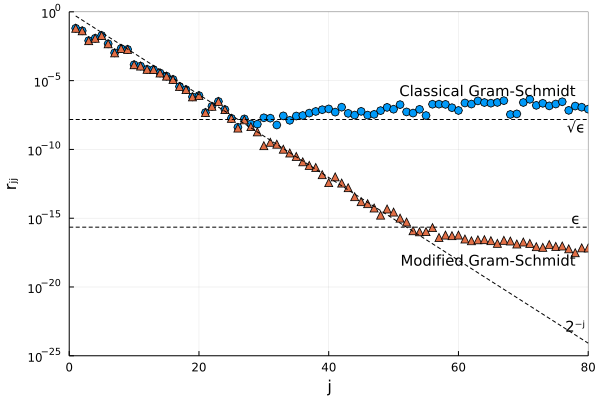

In [15]:
m = 80
A = graded_mat(m)
_, R_cgs = cgs_qr(A)
_, R_mgs = mgs_qr(A)
_, R_hh= qr(A)
p = plot(1:m, [diag(R_cgs) diag(R_mgs)]
    , legend = false
    , l = false
    , m = [:o :utriangle]
    , yscale = :log10
    , xlim = (0,m)
    , ylim = (1.e-25,1.e-0)
    , xlabel = "j"
    , ylabel = "rⱼⱼ"
    , framestyle = :semi
    )
annotate!(p, [(78, maximum(diag(R_cgs)[25:80]), ("Classical Gram-Schmidt", 10, :right, :bottom))])
annotate!(p, [(78, minimum(diag(R_mgs)), ("Modified Gram-Schmidt", 10, :right, :top))])
plot!(p, [1:80], exp2.(-collect(1:80))
    , l = :dash
    , color = :black
    )
emach = eps(eltype(A))
plot!(p, [0,80], [emach,emach]
    , l = :dash
    , color = :black
    )
sqemach = sqrt(emach)
plot!(p, [0,80], [sqemach,sqemach]
    , l = :dash
    , color = :black
    )
annotate!(p, [(78, emach, ("ϵ", 10, :bottom))])
annotate!(p, [(78, sqemach, ("√ϵ", 10, :top))])
annotate!(p, [(78, exp2(-78), ("2⁻ʲ", 10, :bottom))])

**5.** (T&B 9.2) In Question 4, the singular values of `graded_mat` match the diagonal elements of a QR factor $R$ approximately.  Condsider now a very different example.  Suppose $Q = I$ and $A = R$, the $m \times m$ matrix (a _Toeplitz matrix_, where all the entries on the same diagonal have the same value) with 1 on the main diagonal, 2 on the first superdiagonal, and 0 everywhere else.

**(a) [5%]** What are the eigenvalues, determinant, and rank of $A$?

The eigenvalues are all 1, so the determinant is 1 and it is full rank ($m$).

**(b) [5%]** What is $A^{-1}$?

Let $Z$ be the inverse of $A$ and consider the equation $e_k = A z_k$.  Because $A$ only has nonzeros on the main diagonal and the first diagonal, we see

$$
0 = a_{i,i} z_{i,k} + a_{i,i+1} z_{i+1,k} = z_{i,k} + 2 z_{i+1,k}, \quad i < k,
$$
and
$$
1 = z_{k,k}.
$$
This can be turned into a recursive definition of $z_{i,k}$ in terms of $z_{i+1,k}$,
$$
z_{i,k} = -2 z_{i+1,k},
$$
with $z_{k,k} = 1$ as the base case.  The solution of the recursion is $z_{i,k} = (-1)^{k-i}2^{k-i}.$
We notice that means that the value of $z_{i,k}$ depends only on $(k-i)$, which means that $Z$ also has
the contant entries on every diagonal: $Z$ is also a Toeplitz matrix.  So we can define $Z$ as the Toeplitz
matrix with the value 1 on the main diagonal $(-1)^j 2^j$ on the $j$th superdiagonal.

**(c) [5%]** Give a nontrivial upperbound $\sigma_m$, the $m$th singular value of $A$.  You are welcome to use julia for inspiration, but the bound you give should be justified analytically. (Hnt: Use part (b).)

If the SVD of $A$ is $U \Sigma V^*$, then $A^{-1} = V \Sigma^{-1} U^*$.  This is almost an  SVD itself, except for the diagonal of $\Sigma^{-1}$ has positive values that are _non-decreasing_, instead of non-increasing.
This means that the largest singular value of $A^{-1}$ is $\frac{1}{\sigma_m}$, where $\sigma_m$ is the smallest singular value of $A$.

We notice that the vector $z = A^{-1} e_m$ has entries $z_i = (-2)^{m-i}$, so $\|z\|_2 \geq 2^{m-1}$.  This means that $\|A^{-1}\|_2 \geq \|A^{-1} e_m\|_2 \geq 2^{m-1}$, and so the largest singular value of $A^{-1}$ is greater than or equal to $2^{m-1}$.  Therefore
$$
\sigma_m \leq \frac{1}{2^{m-1}} = 2^{1-m}.
$$

**6. [10%]** (T&B 10.2)

**(a)** Write a julia function `W, R = house(A)` that computes an implicit representation of a full QR factorization $A = QR$ of an $m \times n$ matrix $A$ with $m \geq n$ using Householder reflections.  The output variables are a lower-triangular matrix $W \in \mathbb{C}^{m \times n}$ whose columns are the vectors $v_k$ defining the successive Householder reflections, and a triangular matrix $R \in \mathbb{C}^{m \times n}$.

In [16]:
function house(A)
    """
    Triangularize the matrix `A` by Householder reflections.

    # Arguments
    - `A`: m × n matrix (m ≥ n) to triangularize

    # Returns
    - `W`: m × n lower triangular matrix containing the householder vectors
    - `R`: m × n upper triangular matrix resulting from applying 
           the householder tranformations in `W` to `A`
    """
    ### BEGIN SOLUTION
    m, n = size(A)
    W = deepcopy(A)
    R = zeros(eltype(A), m, n)
    for i in 1:n
        R[1:i-1,i] = W[1:i-1,i]
        W[1:i-1,i] .= zero(eltype(A))
        xsign = sign(W[i,i])
        xnorm = norm(W[i:m,i], 2)
        W[i,i] += xsign * xnorm
        W[i:m,i] ./=  norm(W[i:m,i], 2)
        R[i,i] = -xsign * xnorm
        W[i:m,i+1:n] .-= 2*W[i:m,i]*(W[i:m,i]'*W[i:m,i+1:n])
    end
    ### END SOLUTION
    return W, R
end

house (generic function with 1 method)

**(b)** Write a julia function `Q = formQ(W)` that takes the lower triangular `W` from `W, R = house(A)` and computes the unitary matrix $Q$ such that $A = QR$.

In [17]:
function formQ(W)
    """
    Form the unitary matrix implicit in a lower-triangular matrix of Householder reflectors.
    
    # Arguments
    
    - `W`: m × n lower triangular matrix (m ≥ n) of Householder vectors from `W, R = house(A)`
    
    # Returns
    
    - `Q`: m × m unitary matrix such that `R = Q' * A`
    """
    ### BEGIN SOLUTION
    m, n = size(W)
    Q = Matrix(one(eltype(W))*I, m, m)
    for i in n:-1:1
        Q[i:m,i:m] .-= 2*W[i:m,i]*(W[i:m,i]'Q[i:m,i:m])
    end
    ### END SOLUTION
    return Q
end

formQ (generic function with 1 method)

In [18]:
function house_test(A, house, ortho_tol=1.e-12, recon_tol=1.e-12, triu_tol=0.0, tril_tol=0.0)
    """
    Test an implementation of `W, R = house(A)`.
    Run `qr_test` on `formQ(W)` and `R`.
    Print the lower triangularity error of `W` and assert it is less than a specified tolerance.
    Assert that the orthogonality error is less than a specified tolerance.
    
    # Arguments
    
    - `A`: matrix to test
    - `house`: implementation of `W, R = house(A)`
    - `ortho_tol`: tolerance for || I - Q' Q ||_F, where `Q = formQ(W)`
    - `recon_tol`, `triu_tol`: same as `qr_test`
    - `tril_tol`: tolerance for || W - tril(W) ||_F
    
    """
    W, R = house(A)
    function house_qr(A)
        return formQ(W), R
    end
    ortho_err = qr_test(A, house_qr)
    p = minimum(size(W))
    tril_err = norm(W[1:p,1:p] - LowerTriangular(W[1:p,1:p]), 2)
    println("W lower triangularity error: $tril_err")
    @assert ortho_err <= ortho_tol
    @assert tril_err <= tril_tol
    return nothing
end 

house_test (generic function with 5 methods)

In [19]:
# Test a well-conditioned problem

house_test(randn(10, 9), house)

orthogonality error: 1.7987724926543246e-15
reconstruction error: 4.970345735549244e-15
triangularity error: 0.0
W lower triangularity error: 0.0


In [20]:
# Test a complex matrix

house_test(randn(Complex{Float64}, 10, 9), house)

orthogonality error: 1.8906764667297314e-15
reconstruction error: 3.9912307981563e-15
triangularity error: 0.0
W lower triangularity error: 0.0


In [21]:
# Test a graded matrix

house_test(graded_mat(20), house)

orthogonality error: 2.6738581178760397e-15
reconstruction error: 2.762697143299426e-16
triangularity error: 0.0
W lower triangularity error: 0.0


In [22]:
# Test a bigger graded matrix

house_test(graded_mat(40), house)

orthogonality error: 5.420936301325672e-15
reconstruction error: 2.0782619710865627e-16
triangularity error: 0.0
W lower triangularity error: 0.0


In [23]:
# Test an even bigger graded matrix

house_test(graded_mat(60), house)

orthogonality error: 6.571366432084166e-15
reconstruction error: 3.217404375810732e-16
triangularity error: 0.0
W lower triangularity error: 0.0


**7. [10%]** (T&B 11.2 (a)) How closely, as measured in the $L^2$ norm on the interval $[1,2]$, can the function
$f(x) = x^{-1}$ be fitted by a linear combination of the functions $e^x$, $\sin x$, and $\Gamma(x)$? 

- The $L^2$ on a function on a set $S$ is
$$\|f\|_{L^2}  = \left(\int_S |f|^2\ dx\right)^{1/2},$$
and it can be defined in terms of the $L^2$ inner product $(f,g)$ between functions,
$$(f,g) = \int_S fg\ dx.$$

- $\Gamma(x)$ is the gamma function, which can be loaded with the `SpecialFunctions` package in julia as `gamma`.

Write a function to determine the answer to at least two digits of relative accuracy (If $e$ is the true value and $\hat e$ is your estimate, then you must achieve $|e - \hat e| \leq 10^{-2} |e|$).  Return the estimate of the answer, the coefficients of the optimal linear combination, and a plot of the optimal approximation.

In [24]:
function approx_inv_x()
    """
    Approximate x⁻¹ as a linear combination of exp(x), sin(x), and gamma(x).
    
    # Returns
    
    - `est`: estimate of the L² norm || x⁻¹ - (c_exp * exp(x) + c_sin * sin(x) + c_gamma * gamma(x))||
             for the optimal values c_exp, c_sin, c_gamma
    - `c_exp`: optimal coefficient for exp(x)
    - `c_sin`: optimal coefficient for sin(x)
    - `c_gamma`: optimal coefficient for gamma(x)
    - `plt`: a plot of the approximation that can be displayed
    """
    ### BEGIN SOLUTION
    m = 31
    x = collect(Float64,LinRange(1 + 1/m/2:1/m:2 - 1/m/2))
    A = [exp.(x) sin.(x) gamma.(x)]
    b = 1 ./ x
    Q,R = qr(A)
    proj_b = Q' * b
    sol = R \ proj_b[1:3]
    est = norm(proj_b[4:end],2) / sqrt(m)
    c_exp, c_sin, c_gamma = sol
    plt = plot(x, [b A*sol], l=2, xlabel="x", label=["x⁻¹" "approx"])
    ### END SOLUTION
    return est, c_exp, c_sin, c_gamma, plt
 end

approx_inv_x (generic function with 1 method)

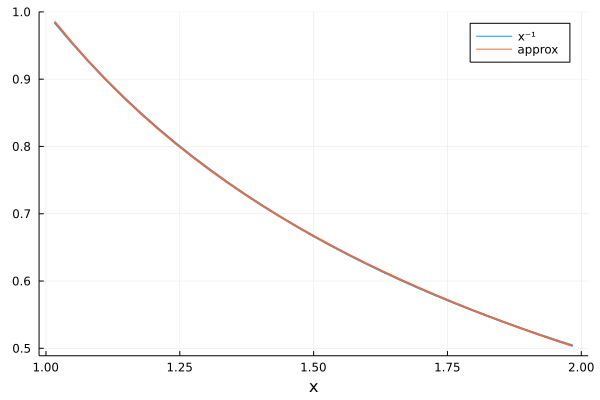

Estimated L² error 0.0005311524860728421
Best approximation: -0.10777810579579344 * exp(x) + 0.009162164741551024 * sin(x) + 1.287235512418102 * gamma(x)


In [25]:
est, c_exp, c_sin, c_gamma, plt = approx_inv_x()
display(plt)
println("Estimated L² error $est")
println("Best approximation: $c_exp * exp(x) + $c_sin * sin(x) + $c_gamma * gamma(x)")
### BEGIN HIDDEN TESTS
est_true = 0.0005364373
c_exp_true = -0.10777608583502836
c_sin_true = 0.009209243611460437
c_gamma_true = 1.287175294677432
@assert abs(est - est_true) / est_true < 1.e-2
@assert abs(c_exp - c_exp_true) / c_exp_true < 1.e-2
@assert abs(c_sin - c_sin_true) / c_sin_true < 1.e-2
@assert abs(c_gamma - c_gamma_true) / c_gamma_true < 1.e-2
### END HIDDEN TESTS

**8.** The Cholesky factorization of a hermitian positive definite matrix is a factorization

$$H = L L^*,$$

where $L$ is lower-triangular.  You may accept without proving that a Cholesky factorization $H = A^* A = L L^*$ exists whenever $A$ is an $m \times n$ matrix with rank $n$.  In julia's `LinearAlgebra` the Cholesky factorization is computing with `cholesky`.  Sometimes the factorization is conventionally expressed as $U'^* U$, where $U$ is upper triangular, so to avoid confusion we must choose `L` or `U`:

In [26]:
A = randn(5,4)
H = A' * A
L, U = cholesky(H)

display(L)
display(U)
display(L * L' - H)
display(U' * U - H)

4×4 LowerTriangular{Float64, Matrix{Float64}}:
  1.44004      ⋅         ⋅         ⋅ 
 -0.0023966   3.5618     ⋅         ⋅ 
 -1.14797     1.11445   0.662215   ⋅ 
 -0.0921108  -1.12642  -0.223637  3.12686

4×4 UpperTriangular{Float64, Matrix{Float64}}:
 1.44004  -0.0023966  -1.14797   -0.0921108
  ⋅        3.5618      1.11445   -1.12642
  ⋅         ⋅          0.662215  -0.223637
  ⋅         ⋅           ⋅         3.12686

4×4 Matrix{Float64}:
 -4.44089e-16  -4.33681e-19  0.0          -2.77556e-17
 -4.33681e-19   1.77636e-15  0.0           8.88178e-16
  0.0           0.0          0.0           2.22045e-16
 -2.77556e-17   8.88178e-16  2.22045e-16   0.0

4×4 Matrix{Float64}:
 -4.44089e-16  -4.33681e-19  0.0          -2.77556e-17
 -4.33681e-19   1.77636e-15  0.0           8.88178e-16
  0.0           0.0          0.0           2.22045e-16
 -2.77556e-17   8.88178e-16  2.22045e-16   0.0

**(a) [5%]** Suppose $A$ is an $m \times n$ matrix with rank $n$.  Prove that if $A^* A = L L^*$ is the Cholesky factorization of $A$, then $Q = A L^{-*}$ is unitary.

Just by multiplying $Q^* Q$ we see

$$Q^* Q = L^{-1} A^* A L^{-*} = L^{-1} L L^* L^{-*} = I,$$

which proves $Q$ is unitary.

**(b) [6%]** Implement `chol_qr`, which computes the QR decomposition of $m \times n$ matrix $A$ with rank $n$ using the Cholesky factorization of $A^*A$.

In [27]:
function chol_qr(A)
    """
    Compute and return the QR factorization of `A` by Cholesky factorization of `A'*A`.

    # Arguments
    
    - `A`: m × n matrix (m ≥ n) to factor

    # Returns

    - `Q`: m × n matrix with orthonormal columns spanning range(A) 
    - `R`: n × n upper triangular matrix, coefficients of columns of `A` 
           in the basis of `Q`
    """
    ### BEGIN SOLUTION
    H = A'*A
    R = cholesky(H).U
    Q = A / R
    ### END SOLUTION
    return Q, R
end

chol_qr (generic function with 1 method)

In [28]:
# Test a well-conditioned problem

ortho_err = qr_test(randn(10, 9), chol_qr)
@assert ortho_err < 1.e-12

orthogonality error: 3.717116025486647e-14
reconstruction error: 9.054213822704332e-16
triangularity error: 0.0


In [29]:
# Test a complex matrix

ortho_err = qr_test(randn(Complex{Float64}, 10, 9), chol_qr)
@assert ortho_err < 1.e-12

orthogonality error: 6.744445807356307e-15
reconstruction error: 8.326225439281216e-16
triangularity error: 0.0


In [30]:
# Test a graded matrix: should lose accuracy

ortho_err = qr_test(graded_mat(20), chol_qr)
@assert ortho_err >= 1.e-8

orthogonality error: 1.954210594019822e-6
reconstruction error: 5.899790687932932e-17
triangularity error: 0.0


**(c) [6%]** The tests above show that, like classical gram-schmidt, the Cholesky QR algorithm is not numerically stable: the computed $Q$ matrix can have columns that are far from orthogonal.

But consider the following algorithm.  Let $(Q_1, R_1)$ be the matrices computed by the Cholesky QR algorithm.
Then let $(Q_2, \tilde{R}_2)$ be the Cholesky QR decomposition of $Q_1$, and define $R_2 = \tilde{R}_2 R_1.$
Repeat this process to get $(Q_k, R_k)$.  This is the _iterated Cholesky QR algorithm_.

Implement the algorithm just described as julia function `iter_chol_qr`.

In [31]:
function iter_chol_qr(A, k)
    """
    Compute and return the QR factorization of `A` by the iterated Cholesky QR factorization.

    # Arguments
    
    - `A`: m × n matrix (m ≥ n) to factor
    - `k`: the number (≥ 1) of iterations to perform. `iter_chol_qr(A, 1)` should be the same as `chol_qr(A)`.

    # Returns

    - `Q`: m × n matrix with orthonormal columns spanning range(A) 
    - `R`: n × n upper triangular matrix, coefficients of columns of `A` 
           in the basis of `Q`
    """
    ### BEGIN SOLUTION
    Q, R = chol_qr(A)
    for i in 2:k
        Q, Rtilde = chol_qr(Q)
        R = Rtilde * R
    end
    ### END SOLUTION
    return Q, R
end

iter_chol_qr (generic function with 1 method)

In [32]:
# Test a well-conditioned problem

chol_qr3(A) = iter_chol_qr(A, 3)

ortho_err = qr_test(randn(10, 9), chol_qr3)
@assert ortho_err < 1.e-12

orthogonality error: 5.17460444255199e-16
reconstruction error: 1.648959886913493e-15
triangularity error: 0.0


In [33]:
# Test a complex matrix

ortho_err = qr_test(randn(Complex{Float64}, 10, 9), chol_qr3)
@assert ortho_err < 1.e-12

orthogonality error: 5.616328943103385e-16
reconstruction error: 1.428443929014412e-15
triangularity error: 0.0


In [34]:
# Test a graded matrix: should keep accuracy

ortho_err = qr_test(graded_mat(20), chol_qr3)
@assert ortho_err <= 1.e-12

orthogonality error: 1.17471668498216e-15
reconstruction error: 1.341325073246396e-16
triangularity error: 0.0


**(d) [4%]** Make a plot showing the orthogonality errors of `iter_chol_qr` for different choices of $k$.
For each $k \in \{1,\dots,4\}$ and each $m \in \{5, \dots, 20\}$, you should compute `Q, R = iter_chol_qr(graded_mat(m), k)`, and then compute the orthogonality error $\|I - Q^* Q \|_F$.  Put one line in your plot for each $k$, 
with $m$ as the x-axis and orthogonality error as the y-axis.  Use a logarithmic scale for the the y-axis,
and label the axes and each line.  After that answer the question: how many iterations of `iter_chol_qr` apears to be the best choice?

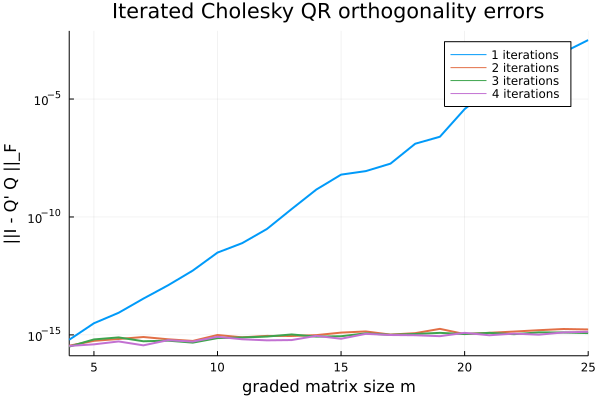

In [35]:
m_min = 4
m_max = 25
p = plot(xlim = (m_min, m_max)
    , title = "Iterated Cholesky QR orthogonality errors"
    , xlabel = "graded matrix size m"
    , ylabel = "||I - Q' Q ||_F"
    , yscale = :log10
    )
for k = 1:4
    ortho_errs = []
    for m = m_min:m_max
        Q, R = iter_chol_qr(graded_mat(m), k)
        push!(ortho_errs, norm(I - Q'*Q, 2))
    end
    plot!(p, m_min:m_max, ortho_errs, l = 2, label = "$k iterations")
end
p

The best choice is 2 iterations: after that the orthogonality does not improve.